# Notebook 2 - CNN e LSTM
 - No presente documento, seguem-se os códigos de implementação de algorítmos de análise de sentimento de reviews de mouses, com base nos modelos listados acima, seguindo a seguinte ordem:
    - Importação dos dados
    - Estruturação inicial do modelo
    - Construção do modelo
    - Treinamento
    - Obtenção de resultados
 - Os passos se repetem, a medida que se tenta avaliar o mesmo cenário, com diferentes ajustes nos dados

# LSTM

### LSTM com dados brutos

### Divisão dos dados

In [4]:
# Dados desbalanceados
x, y = df['description'], df['score']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

#Dados balanceados
X_train_bal = pd.read_csv('x_treino_bal_tratado.csv')
y_train_bal = pd.read_csv('y_treino_bal.csv') 

In [5]:
X_train_bal.drop('Unnamed: 0',axis=1,inplace=True)
y_train_bal.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
print('x de treino normal:',X_train.shape)
print('x de treino balanceado:',X_train_bal.shape)
print('y de treino normal:',y_train.shape)
print('y de treino balanceado:',y_train_bal.shape)

x de treino normal: (3840,)
x de treino balanceado: (10902, 1)
y de treino normal: (3840,)
y de treino balanceado: (10902, 1)


## Inicialização

In [7]:
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(df['description'])

In [8]:
X_train = tokenizer.texts_to_sequences(X_train.values)
X_test = tokenizer.texts_to_sequences(X_test.values)

In [9]:
# Corrigindo diferença nos shapes

new_x_train = np.zeros((3840,300))
new_x_test = np.zeros((960,300))

In [10]:
line_count=0
for i in X_train:
    for j in range(len(i)):
        new_x_train[line_count][j]=i[j]
    line_count+=1

In [11]:
line_count=0
for i in X_test:
    for j in range(len(i)):
        new_x_test[line_count][j]=i[j]
    line_count+=1

In [12]:
X_train = new_x_train
X_test = new_x_test

### Estruturação do Modelo e Treinamento

In [13]:
import tensorflow as tf

########################
#valores iniciais, a serem tunados
max_review_length = X_train.shape[1]
top_words = 10000
embedding_dim = 128
########################

model = Sequential()
model.add(Embedding(input_dim=top_words, output_dim=embedding_dim, input_length=max_review_length))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(196))
model.add(Dense(units=3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 128)          1280000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 300, 128)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 196)               254800    
                                                                 
 dense (Dense)               (None, 3)                 591       
                                                                 
Total params: 1,535,391
Trainable params: 1,535,391
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
history = model.fit(X_train, y_train, epochs=5, batch_size=64,verbose = 1,validation_data=(X_test,y_test))

Epoch 1/5
60/60 [==============================] - 72s 1s/step - loss: 0.3062 - accuracy: 0.9328 - val_loss: 0.2462 - val_accuracy: 0.9458
Epoch 2/5
60/60 [==============================] - 68s 1s/step - loss: 0.2460 - accuracy: 0.9464 - val_loss: 0.2468 - val_accuracy: 0.9458
Epoch 3/5
60/60 [==============================] - 67s 1s/step - loss: 0.2471 - accuracy: 0.9464 - val_loss: 0.2458 - val_accuracy: 0.9458
Epoch 4/5
60/60 [==============================] - 67s 1s/step - loss: 0.2449 - accuracy: 0.9464 - val_loss: 0.2460 - val_accuracy: 0.9458
Epoch 5/5
60/60 [==============================] - 67s 1s/step - loss: 0.2445 - accuracy: 0.9464 - val_loss: 0.2513 - val_accuracy: 0.9458


### Resultados

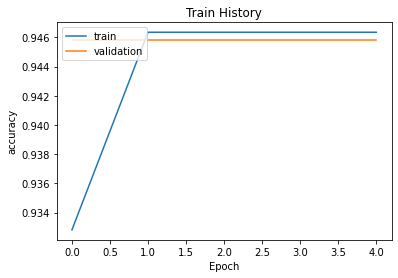

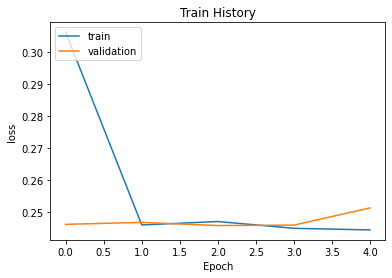

In [25]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
show_train_history(history,'accuracy','val_accuracy')
show_train_history(history,'loss','val_loss')

In [42]:
print('Training loss \t', history.history['loss'][-1])
print('Training accuracy ',  history.history['accuracy'][-1])
print('Validation loss ', history.history['val_loss'][-1])
print('Validation accuracy ',  history.history['val_accuracy'][-1])

Training loss 	 0.24445022642612457
Training accuracy  0.9463541507720947
Validation loss  0.25132042169570923
Validation accuracy  0.9458333253860474


In [43]:
# Final evaluation of the model using test dataset
# Students will be starting their code from here:
scores = model.evaluate(X_test, y_test, verbose=1)
print('Testing loss \t', scores[0])
print('Testing accuracy ', scores[1])

30/30 [==============================] - 7s 216ms/step - loss: 0.2513 - accuracy: 0.9458
Testing loss 	 0.25132039189338684
Testing accuracy  0.9458333253860474


### LSTM com dados tratados e balanceados (sem stemming)

In [47]:
X_train_bal.dropna(inplace=True)

In [48]:
X_train_bal=X_train_bal['0']

In [49]:
X_train_bal = tokenizer.texts_to_sequences(X_train_bal.values)

In [50]:
# Corrigindo diferença nos shapes

new_x_train = np.zeros((10902,300))

line_count=0
for i in X_train_bal:
    for j in range(len(i)):
        new_x_train[line_count][j]=i[j]
    line_count+=1

X_train_bal = new_x_train

In [51]:
X_train_bal.shape

(10902, 300)

In [52]:
y_train_bal=y_train_bal['0']

In [ ]:
history = model.fit(X_train_bal, y_train_bal, epochs=5, batch_size=64,verbose = 1,validation_data=(X_test,y_test))

Epoch 1/5
171/171 [==============================] - 213s 1s/step - loss: 1.1292 - accuracy: 0.3307 - val_loss: 1.1068 - val_accuracy: 0.0354
Epoch 2/5
171/171 [==============================] - 209s 1s/step - loss: 1.0990 - accuracy: 0.3332 - val_loss: 1.1444 - val_accuracy: 0.0354
Epoch 3/5
171/171 [==============================] - 210s 1s/step - loss: 1.0994 - accuracy: 0.3311 - val_loss: 1.1085 - val_accuracy: 0.0354
Epoch 4/5
171/171 [==============================] - 214s 1s/step - loss: 1.0990 - accuracy: 0.3287 - val_loss: 1.1186 - val_accuracy: 0.0354
Epoch 5/5
171/171 [==============================] - 208s 1s/step - loss: 1.0989 - accuracy: 0.3303 - val_loss: 1.1249 - val_accuracy: 0.0188


# CNN

### CNN com dados brutos

In [62]:
# create the model
embedding_vector_length = 32
cnn_model = Sequential()


cnn_model.add(Embedding(input_dim=top_words, output_dim=embedding_vector_length, input_length=max_review_length))
cnn_model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Dropout(0.5))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=3, activation='softmax'))


cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(cnn_model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 300, 32)           320000    
                                                                 
 conv1d_6 (Conv1D)           (None, 300, 32)           3104      
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 150, 32)          0         
 1D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 150, 32)           0         
                                                                 
 flatten_2 (Flatten)         (None, 4800)              0         
                                                                 
 dense_7 (Dense)             (None, 3)                 14403     
                                                      

In [61]:
history_c=cnn_model.fit(X_train, y_train, epochs=10, batch_size=64,verbose = 1,validation_data=(X_test,y_test))

Epoch 1/10
60/60 [==============================] - 3s 35ms/step - loss: 0.3339 - accuracy: 0.9352 - mae: 1.6011 - val_loss: 0.2423 - val_accuracy: 0.9458 - val_mae: 1.6007
Epoch 2/10
60/60 [==============================] - 2s 33ms/step - loss: 0.2332 - accuracy: 0.9464 - mae: 1.6011 - val_loss: 0.2344 - val_accuracy: 0.9458 - val_mae: 1.6007
Epoch 3/10
60/60 [==============================] - 2s 36ms/step - loss: 0.2185 - accuracy: 0.9464 - mae: 1.6011 - val_loss: 0.2169 - val_accuracy: 0.9458 - val_mae: 1.6007
Epoch 4/10
60/60 [==============================] - 2s 37ms/step - loss: 0.1791 - accuracy: 0.9461 - mae: 1.6011 - val_loss: 0.1865 - val_accuracy: 0.9448 - val_mae: 1.6007
Epoch 5/10
60/60 [==============================] - 2s 32ms/step - loss: 0.1304 - accuracy: 0.9557 - mae: 1.6011 - val_loss: 0.1675 - val_accuracy: 0.9542 - val_mae: 1.6007
Epoch 6/10
60/60 [==============================] - 2s 34ms/step - loss: 0.0947 - accuracy: 0.9669 - mae: 1.6011 - val_loss: 0.2041 - v

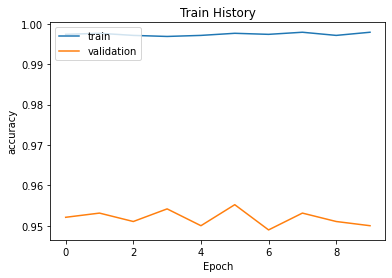

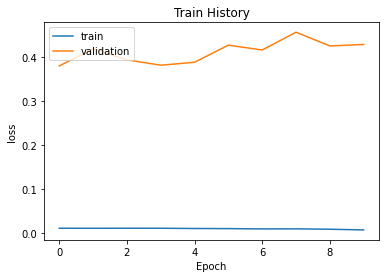

Training loss 	 0.810245331376791
Training accuracy  99.79166388511658
Validation loss  42.85649061203003
Validation accuracy  94.9999988079071


In [40]:
# Final evaluation of the CNN + RNN model using the test data
# Students will be starting their code from here:
show_train_history(history_c,'accuracy','val_accuracy')
show_train_history(history_c,'loss','val_loss')

print('Training loss \t', history_c.history['loss'][-1]*100)
print('Training accuracy ',  history_c.history['accuracy'][-1]*100)
print('Validation loss ', history_c.history['val_loss'][-1]*100)
print('Validation accuracy ',  history_c.history['val_accuracy'][-1]*100)

In [45]:
# Final evaluation of the model using test dataset
# Students will be starting their code from here:

cnn_scores = cnn_model.evaluate(X_test, y_test, verbose=1)
print('Testing loss \t', cnn_scores[0])
print('Testing accuracy ', cnn_scores[1])

30/30 [==============================] - 0s 10ms/step - loss: 0.4286 - accuracy: 0.9500
Testing loss 	 0.4285649061203003
Testing accuracy  0.949999988079071


### CNN com dados balanceados

In [92]:
history_c2=cnn_model.fit(X_train_bal, y_train_bal, epochs=10, batch_size=64,verbose = 1,validation_data=(X_test,y_test))

Epoch 1/10
171/171 [==============================] - 7s 36ms/step - loss: 0.8046 - accuracy: 0.6812 - val_loss: 0.4115 - val_accuracy: 0.9333
Epoch 2/10
171/171 [==============================] - 6s 33ms/step - loss: 0.2639 - accuracy: 0.9329 - val_loss: 0.2247 - val_accuracy: 0.9542
Epoch 3/10
171/171 [==============================] - 6s 34ms/step - loss: 0.1936 - accuracy: 0.9530 - val_loss: 0.1951 - val_accuracy: 0.9531
Epoch 4/10
171/171 [==============================] - 6s 35ms/step - loss: 0.1745 - accuracy: 0.9596 - val_loss: 0.2015 - val_accuracy: 0.9510
Epoch 5/10
171/171 [==============================] - 6s 35ms/step - loss: 0.1569 - accuracy: 0.9612 - val_loss: 0.2211 - val_accuracy: 0.9479
Epoch 6/10
171/171 [==============================] - 6s 35ms/step - loss: 0.1478 - accuracy: 0.9644 - val_loss: 0.1960 - val_accuracy: 0.9510
Epoch 7/10
171/171 [==============================] - 6s 33ms/step - loss: 0.1416 - accuracy: 0.9651 - val_loss: 0.2251 - val_accuracy: 0.9438

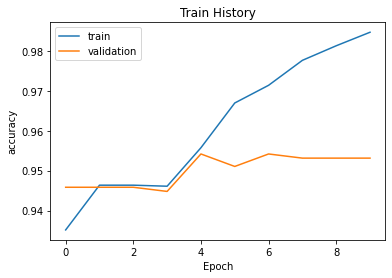

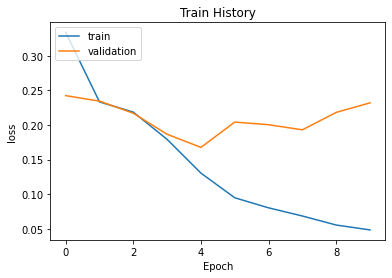

Training loss 	 0.04830702021718025
Training accuracy  0.9846354126930237
Validation loss  0.23186710476875305
Validation accuracy  0.953125


In [95]:
show_train_history(history_c,'accuracy','val_accuracy')
show_train_history(history_c,'loss','val_loss')

print('Training loss \t', history_c.history['loss'][-1])
print('Training accuracy ',  history_c.history['accuracy'][-1])
print('Validation loss ', history_c.history['val_loss'][-1])
print('Validation accuracy ',  history_c.history['val_accuracy'][-1])

In [96]:
cnn_scores2 = cnn_model.evaluate(X_test, y_test, verbose=1)
print('Testing loss \t', cnn_scores2[0])
print('Testing accuracy ', cnn_scores2[1])

30/30 [==============================] - 1s 11ms/step - loss: 0.2198 - accuracy: 0.9458
Testing loss 	 0.21978332102298737
Testing accuracy  0.9458333253860474


### CNN com dados balanceados + Stemming

In [97]:
X_train_bal_stem = pd.read_csv('x_treino_bal_tratado_stem.csv')
X_train_bal_stem.drop('Unnamed: 0', axis =1, inplace=True)

In [99]:
X_train_bal_stem=X_train_bal_stem['0']

In [103]:
X_train_bal_stem.dropna(inplace=True)

In [104]:
X_train_bal_stem = tokenizer.texts_to_sequences(X_train_bal_stem.values)

In [105]:
# Corrigindo diferença nos shapes

new_x_train = np.zeros((10902,300))

line_count=0
for i in X_train_bal:
    for j in range(len(i)):
        new_x_train[line_count][j]=i[j]
    line_count+=1

X_train_bal_stem = new_x_train

In [106]:
history_c3=cnn_model.fit(X_train_bal_stem, y_train_bal, epochs=10, batch_size=64,verbose = 1,validation_data=(X_test,y_test))

Epoch 1/10
171/171 [==============================] - 6s 34ms/step - loss: 0.1269 - accuracy: 0.9680 - val_loss: 0.2230 - val_accuracy: 0.9438
Epoch 2/10
171/171 [==============================] - 6s 34ms/step - loss: 0.1257 - accuracy: 0.9678 - val_loss: 0.2345 - val_accuracy: 0.9406
Epoch 3/10
171/171 [==============================] - 6s 33ms/step - loss: 0.1218 - accuracy: 0.9684 - val_loss: 0.2337 - val_accuracy: 0.9417
Epoch 4/10
171/171 [==============================] - 6s 34ms/step - loss: 0.1217 - accuracy: 0.9700 - val_loss: 0.2303 - val_accuracy: 0.9438
Epoch 5/10
171/171 [==============================] - 6s 33ms/step - loss: 0.1205 - accuracy: 0.9690 - val_loss: 0.2314 - val_accuracy: 0.9438
Epoch 6/10
171/171 [==============================] - 5s 32ms/step - loss: 0.1159 - accuracy: 0.9709 - val_loss: 0.2409 - val_accuracy: 0.9396
Epoch 7/10
171/171 [==============================] - 6s 34ms/step - loss: 0.1131 - accuracy: 0.9719 - val_loss: 0.2388 - val_accuracy: 0.9396

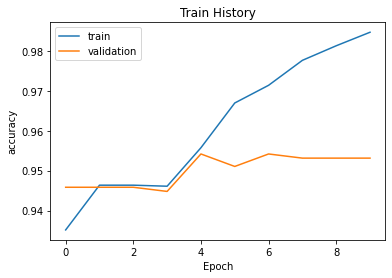

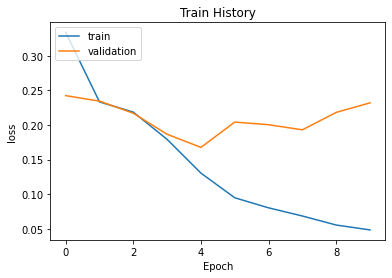

Training loss 	 0.04830702021718025
Training accuracy  0.9846354126930237
Validation loss  0.23186710476875305
Validation accuracy  0.953125


In [107]:
show_train_history(history_c,'accuracy','val_accuracy')
show_train_history(history_c,'loss','val_loss')

print('Training loss \t', history_c.history['loss'][-1])
print('Training accuracy ',  history_c.history['accuracy'][-1])
print('Validation loss ', history_c.history['val_loss'][-1])
print('Validation accuracy ',  history_c.history['val_accuracy'][-1])

In [108]:
cnn_scores2 = cnn_model.evaluate(X_test, y_test, verbose=1)
print('Testing loss \t', cnn_scores2[0])
print('Testing accuracy ', cnn_scores2[1])

30/30 [==============================] - 0s 6ms/step - loss: 0.2450 - accuracy: 0.9427
Testing loss 	 0.24500875174999237
Testing accuracy  0.9427083134651184


## Comparing the models

In [58]:
#Creating a function to display values:
def show_values_on_bars(axs, h_v="v", space=0.2):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = "{:.4f}".format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = "{:.2f}".format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)



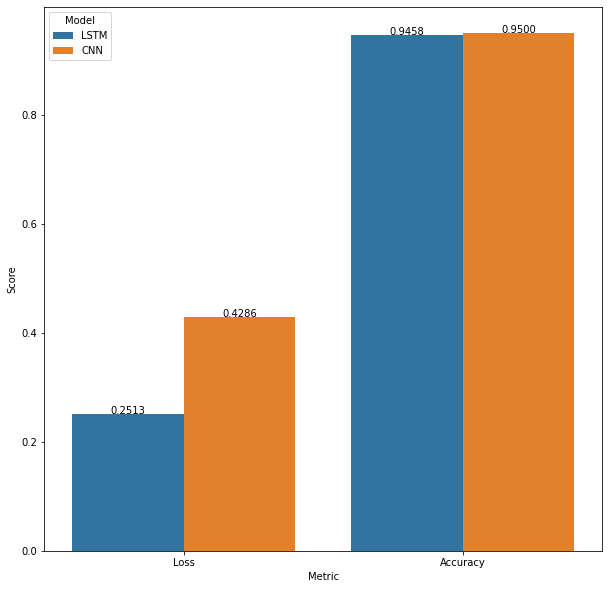

In [59]:
#Dataframe com melhores resultados

import seaborn as sns
import pandas as pd

results=[]
results.append([scores[0], 'Loss', 'LSTM'])
results.append([scores[1], 'Accuracy', 'LSTM'])
results.append([cnn_scores[0], 'Loss', 'CNN'])
results.append([cnn_scores[1], 'Accuracy', 'CNN'])


comparison = pd.DataFrame(results, columns = ['Score', 'Metric', 'Model'])

plt.figure(figsize=(10,10))
plot = sns.barplot(x=comparison['Metric'],y=comparison['Score'], hue = comparison['Model'])

show_values_on_bars(plot)